# Задача распознавания объектов с помощью технологии YOLO

 ## 1. Подключение библиотек

Подключим все необходимые библиотеки, которые нам понадобятся при работе с данными и алгоритмом YOLO

In [ ]:
%pip install ultralytics  # install
from ultralytics import YOLO, checks, hub
checks()  # checks

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.8/78.2 GB disk)


## 2. Подготовка данных и обучение модели

Подготовить выбранные данные, как и обучить модель с помощью алгоритма YOLO, на самом деле довольно просто. Как сказано в инструкции, сначала мы загружаем предварительно обученную модель обнаружения. Затем обучаем модель уже на том датасете, который был нами выбран. Я выбрал датасет с пшеничными колосками, который есть в открытом доступе.

In [ ]:
# Load a model
model = YOLO('yolov8n.yaml')  # build a new model from scratch

# Use the model
results = model.train(data='GlobalWheat2020.yaml', epochs=3)  # train the model

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=GlobalWheat2020.yaml, epochs=3, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

100%|██████████| 6.45G/6.45G [05:53<00:00, 19.6MB/s]
Unzipping /content/datasets/GlobalWheat2020/global-wheat-codalab-official.zip to /content/datasets/GlobalWheat2020/global-wheat-codalab-official...: 100%|██████████| 4716/4716 [01:05<00:00, 72.23file/s] 


100%|██████████| 2.77M/2.77M [00:00<00:00, 45.9MB/s]
Unzipping /content/datasets/GlobalWheat2020/GlobalWheat2020_labels.zip to /content/datasets/GlobalWheat2020/labels...: 100%|██████████| 3384/3384 [00:00<00:00, 6678.83file/s]

Dataset download success ✅ (421.6s), saved to /content/datasets



100%|██████████| 755k/755k [00:00<00:00, 17.5MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 82.5MB/s]


AMP: checks passed ✅


train: Scanning /content/datasets/GlobalWheat2020/labels/arvalis_1... 3376 images, 46 backgrounds, 0 corrupt: 100%|██████████| 3422/3422 [00:27<00:00, 125.40it/s]


train: New cache created: /content/datasets/GlobalWheat2020/labels/arvalis_1.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/datasets/GlobalWheat2020/labels/ethz_1... 747 images, 0 backgrounds, 0 corrupt: 100%|██████████| 747/747 [00:01<00:00, 681.29it/s]

val: New cache created: /content/datasets/GlobalWheat2020/labels/ethz_1.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      4.21G      3.488      2.095      2.973        793        640: 100%|██████████| 214/214 [03:16<00:00,  1.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.22it/s]


                   all        747      49603       0.64      0.564      0.623      0.261

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      3.85G      2.275      1.334      1.884        900        640: 100%|██████████| 214/214 [02:56<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:19<00:00,  1.23it/s]


                   all        747      49603      0.746      0.683      0.755      0.356

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      3.12G      2.104      1.215      1.691        770        640: 100%|██████████| 214/214 [02:55<00:00,  1.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [00:20<00:00,  1.16it/s]


                   all        747      49603      0.839      0.738      0.833      0.432

3 epochs completed in 0.171 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [01:12<00:00,  3.02s/it]


                   all        747      49603      0.839      0.738      0.833      0.432
Speed: 0.7ms preprocess, 2.9ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


## 3. Оценка модели

Чтобы оценить производительность модели, воспользуемся снова командой из инструкции. С помощью неё модель прогонится по валидационной выборке и будут получены результаты данной прогонки.

In [ ]:
results = model.val()  # evaluate model performance on the validation set

Ultralytics YOLOv8.2.10 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/datasets/GlobalWheat2020/labels/ethz_1.cache... 747 images, 0 backgrounds, 0 corrupt: 100%|██████████| 747/747 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [01:15<00:00,  1.61s/it]


                   all        747      49603      0.838      0.739      0.833      0.432
Speed: 0.4ms preprocess, 5.2ms inference, 0.0ms loss, 5.2ms postprocess per image
Results saved to runs/detect/train2


Воспользуемся библиотекой из Python для отрисовки изображений

In [ ]:
import IPython

Отобразим некоторые характеристики нашей модели, полученные в процессе прогонки

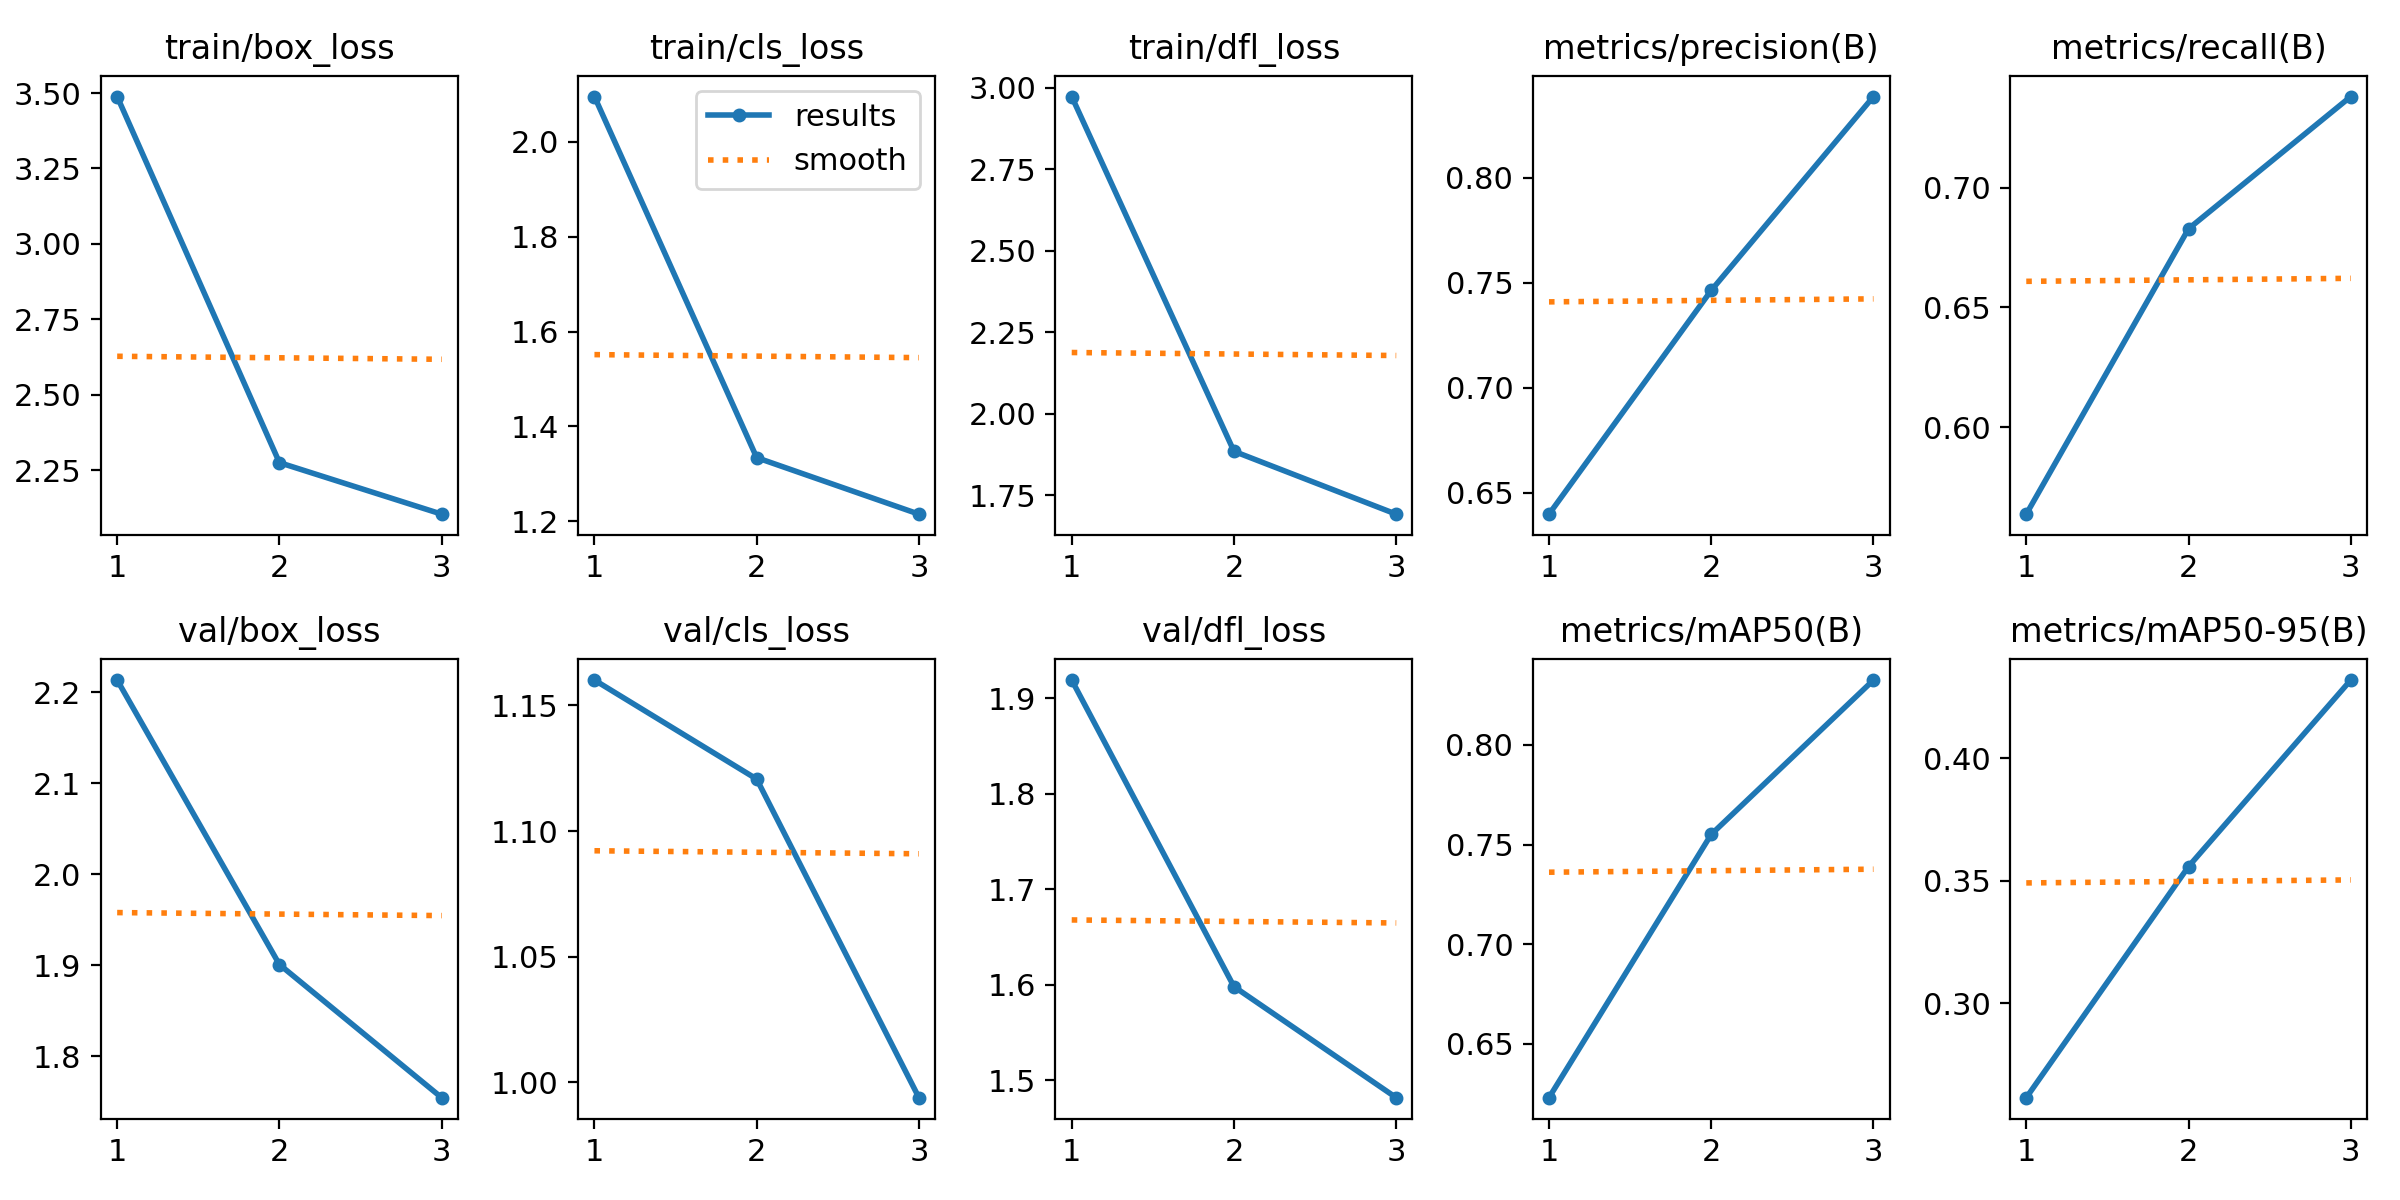

In [ ]:
IPython.display.Image('./runs/detect/train2/results.png', width=900)

## 4. Получение результатов

Чтобы проверить алгоритм распознавания, найдём и загрузим подходящую картинку из интернета

In [ ]:
result = model('1.jpg', save=True)  # predict on an image


image 1/1 /content/1.jpg: 384x640 18 wheat_heads, 367.6ms
Speed: 4.0ms preprocess, 367.6ms inference, 1.7ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/train3


Как видим, алгоритм работает не идеально (не все колоски были найдены, а некоторые обнаружения были ложными, так как спутали облако и колосок), однако некоторую часть колосков он смог распознать. Скорее всего для повышения результата требуется обучить модель на большем количестве эпох, т.к. пшеничный колосок имеет неочивидные признаки для распознавания.

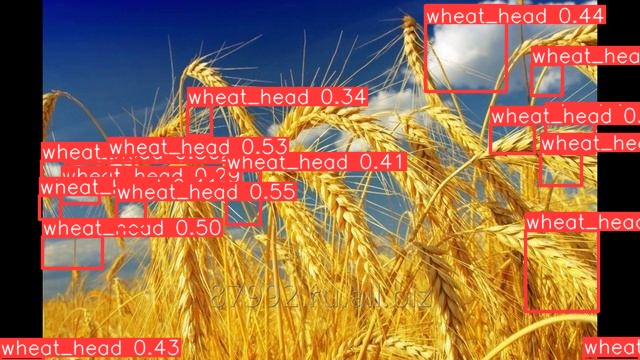

In [ ]:
IPython.display.Image('./runs/detect/train3/1.jpg', width=600)

Вывод: технология YOLO позволяет без особого труда использовать алгоритм распознавания объектов на изображениях. Также с помощью YOLO можно выполнять и другие задачи: классификация объектов на изображениях, выделение контуров объектов, определять траекторию объектов и различные позы. Таким образом, YOLO является отличным инструментом, которым может воспользоваться даже неопытный программист.